In [1]:
# Importação das bibliotecas necessárias para executar o trabalho
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors, datasets
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import GridSearchCV
from sklearn.utils._testing import ignore_warnings
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
import sklearn.metrics as metric
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
import seaborn as sns

In [2]:
#Upload de arquivos para o Colab
from google.colab import files
arquivo = files.upload()

Saving pendigits.tra to pendigits.tra
Saving pendigits.tes to pendigits.tes


In [3]:
#leitura dos arquivos e transformação para CSV
train = pd.read_csv('pendigits.tra', header=None, sep=',')
test = pd.read_csv('pendigits.tes', header=None, sep=',')
train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98,8
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1


In [4]:
#Separação dos dados para treino
X = train.iloc[:, :-1].values

In [5]:
#Separação dos dados de alvo para treino
y= train.iloc[:,-1].values 

In [6]:
#Separação dos dados de teste
X_test = test.iloc[:,:-1].values 

In [7]:
#Separação dos dados de alvo para o teste
y_test= test.iloc[:,-1].values 

In [ ]:
#Definição da função de GridSearch para encontrar os melhores parâmetros
@ignore_warnings(category=ConvergenceWarning)
def search(parameters, cv, score, X, y):
    best = GridSearchCV(MLPClassifier(), parameters, cv=cv, scoring=score, n_jobs=-1, return_train_score=False, verbose=1)
    best.fit(X,y)
    print("Best parameters set found on development set:")
    print(best.best_params_)
  

In [ ]:
#Definição dos parâmetros iniciais do Grid Search
parameters = [{'activation': ['identity', 'logistic', 'tanh', 'relu'],
            'solver': ['lbfgs', 'sgd', 'adam'],
            'hidden_layer_sizes': [(10,10,10),(15,15,15),(30,30,30),(10,50,10),(5,5,10),
                                   (10,10,10,10,10),(35,35,35),(40,40,40),(50,50,50),
                                   (25,25,25),(20,20,20),(10,20,10),(46,26),(20,),(21,)],
            'learning_rate': ['constant','invscaling','adaptive']}]

cv = 5
score = 'accuracy'

In [ ]:
# Execução da procura pelos melhores parâmetros
search(parameters,cv,score,X,y)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Best parameters set found on development set:
{'activation': 'relu', 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}


In [8]:
#Execução da rede com os melhores parâmetros descobertos na função anterior
mlp = MLPClassifier(solver='adam', hidden_layer_sizes=(50,50,50), activation='relu',learning_rate="adaptive", verbose=1) # parâmetros da rede neural
mlp.fit(X, y)                        # treino
y_pred=mlp.predict(X_test)                        # predição
accuracy=metric.accuracy_score(np.array(y_test).flatten(), np.array(y_pred).flatten(), normalize=True)
print('acuracy=',accuracy)       

Iteration 1, loss = 6.58987581
Iteration 2, loss = 0.69097363
Iteration 3, loss = 0.35750203
Iteration 4, loss = 0.23515431
Iteration 5, loss = 0.16890217
Iteration 6, loss = 0.13360087
Iteration 7, loss = 0.11132278
Iteration 8, loss = 0.09417789
Iteration 9, loss = 0.08288795
Iteration 10, loss = 0.07159785
Iteration 11, loss = 0.06698443
Iteration 12, loss = 0.05711236
Iteration 13, loss = 0.05224515
Iteration 14, loss = 0.04803119
Iteration 15, loss = 0.04373510
Iteration 16, loss = 0.03928671
Iteration 17, loss = 0.03777804
Iteration 18, loss = 0.03424148
Iteration 19, loss = 0.03244920
Iteration 20, loss = 0.03097335
Iteration 21, loss = 0.02740462
Iteration 22, loss = 0.02554943
Iteration 23, loss = 0.02473358
Iteration 24, loss = 0.02353366
Iteration 25, loss = 0.02183578
Iteration 26, loss = 0.01976759
Iteration 27, loss = 0.01824293
Iteration 28, loss = 0.01841023
Iteration 29, loss = 0.01731656
Iteration 30, loss = 0.01903885
Iteration 31, loss = 0.01675607
Iteration 32, los

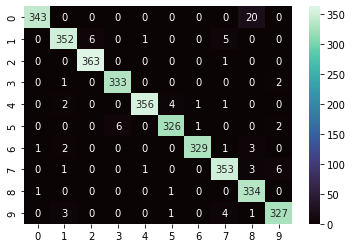

In [ ]:
#Gera a matriz de confusão para o conunto de teste na visualização de HeatMMap
cf = confusion_matrix(y_test,y_pred)
lbl1=["0","1", "2","3","4","5","6","7","8","9"]
lbl2 = ["0","1", "2","3","4","5","6","7","8","9"]
sns.heatmap(cf,annot=True,cmap="mako", fmt="d",xticklabels=lbl1,yticklabels=lbl2)
plt.show()

In [ ]:
#Gera as informações da classificação como precisão, recall e f1-score
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.94      0.97       363
           1       0.98      0.97      0.97       364
           2       0.98      1.00      0.99       364
           3       0.98      0.99      0.99       336
           4       0.99      0.98      0.99       364
           5       0.98      0.97      0.98       335
           6       0.99      0.98      0.99       336
           7       0.97      0.97      0.97       364
           8       0.93      0.99      0.96       336
           9       0.97      0.97      0.97       336

    accuracy                           0.98      3498
   macro avg       0.98      0.98      0.98      3498
weighted avg       0.98      0.98      0.98      3498



CROSS VALIDATION

In [ ]:
#Definição e FIT da função do KNN
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
#Armazena as predições do algoritmo para calcular as métricas
predictions_train = knn.predict(X)
#Calcula a acurácia do treino
print(classification_report(y,predictions_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       780
           1       1.00      1.00      1.00       779
           2       1.00      1.00      1.00       780
           3       1.00      1.00      1.00       719
           4       1.00      1.00      1.00       780
           5       1.00      1.00      1.00       720
           6       1.00      1.00      1.00       720
           7       1.00      1.00      1.00       778
           8       1.00      1.00      1.00       719
           9       1.00      1.00      1.00       719

    accuracy                           1.00      7494
   macro avg       1.00      1.00      1.00      7494
weighted avg       1.00      1.00      1.00      7494



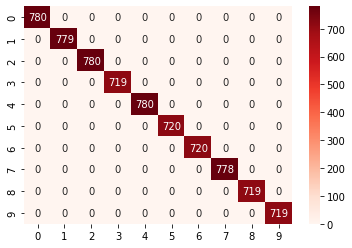

In [ ]:
#Gera a matriz de confusão do treino na visualização de HeatMMap
cf = confusion_matrix(y,predictions_train)
lbl1=["0","1", "2","3","4","5","6","7","8","9"]
lbl2 = ["0","1", "2","3","4","5","6","7","8","9"]
sns.heatmap(cf,annot=True,cmap="Reds", fmt="d",xticklabels=lbl1,yticklabels=lbl2)
plt.show()

In [ ]:
#Calcula a acurácia para o conjunto de teste
predictions = knn.predict(X_test)
#Gera as informações da classificação como precisão, recall e f1-score
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       363
           1       0.96      0.96      0.96       364
           2       0.96      0.99      0.98       364
           3       0.97      0.99      0.98       336
           4       1.00      0.98      0.99       364
           5       0.96      0.97      0.96       335
           6       0.98      1.00      0.99       336
           7       0.99      0.96      0.97       364
           8       0.99      1.00      0.99       336
           9       0.98      0.96      0.97       336

    accuracy                           0.98      3498
   macro avg       0.98      0.98      0.98      3498
weighted avg       0.98      0.98      0.98      3498



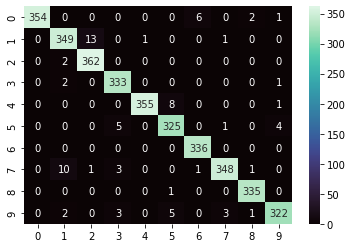

In [ ]:
#Gera a matriz de confusão para o conunto de teste na visualização de HeatMMap
cf = confusion_matrix(y_test,predictions)
lbl1=["0","1", "2","3","4","5","6","7","8","9"]
lbl2 = ["0","1", "2","3","4","5","6","7","8","9"]
sns.heatmap(cf,annot=True,cmap="mako", fmt="d",xticklabels=lbl1,yticklabels=lbl2)
plt.show()

HOLDOUT

In [ ]:
#Separa conjunto de treino e teste
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=1,weights='distance')
neigh.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1, weights='distance')

In [ ]:
#Calcula a acurácia
predictions_train = neigh.predict(x_train)
#Gera as informações da classificação como precisão, recall e f1-score
print(classification_report(y_train,predictions_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       558
           1       1.00      1.00      1.00       555
           2       1.00      1.00      1.00       540
           3       1.00      1.00      1.00       502
           4       1.00      1.00      1.00       550
           5       1.00      1.00      1.00       505
           6       1.00      1.00      1.00       506
           7       1.00      1.00      1.00       518
           8       1.00      1.00      1.00       495
           9       1.00      1.00      1.00       516

    accuracy                           1.00      5245
   macro avg       1.00      1.00      1.00      5245
weighted avg       1.00      1.00      1.00      5245



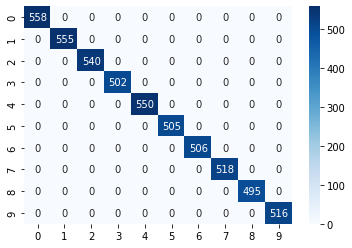

In [ ]:
#Gera a matriz de confusão do treino na visualização de HeatMMap
cf = confusion_matrix(y_train,predictions_train)
lbl1=["0","1", "2","3","4","5","6","7","8","9"]
lbl2 = ["0","1", "2","3","4","5","6","7","8","9"]
sns.heatmap(cf,annot=True,cmap="Blues", fmt="d",xticklabels=lbl1,yticklabels=lbl2)

In [ ]:
#Calcula a acurácia do teste
predictions = neigh.predict(x_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       222
           1       0.99      0.98      0.98       224
           2       1.00      1.00      1.00       240
           3       0.97      0.99      0.98       217
           4       0.99      0.99      0.99       230
           5       0.99      0.98      0.98       215
           6       0.99      1.00      0.99       214
           7       0.98      0.99      0.99       260
           8       0.99      0.99      0.99       224
           9       1.00      0.98      0.99       203

    accuracy                           0.99      2249
   macro avg       0.99      0.99      0.99      2249
weighted avg       0.99      0.99      0.99      2249



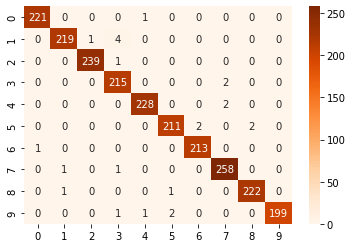

In [ ]:
#Gera a matriz de confusão para o conunto de teste na visualização de HeatMMap
cf = confusion_matrix(y_test,predictions)
lbl1=["0","1", "2","3","4","5","6","7","8","9"]
lbl2 = ["0","1", "2","3","4","5","6","7","8","9"]
sns.heatmap(cf,annot=True,cmap="Oranges", fmt="d",xticklabels=lbl1,yticklabels=lbl2)